<a href="https://colab.research.google.com/github/lucasPrado94/Graduacao/blob/master/L%C3%B3gica_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx==2.3
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Entrada do sistema fuzzy
preco = ctrl.Antecedent(np.arange(40000,100000,1),'preco')
consumo = ctrl.Antecedent(np.arange(11,18,1),'consumo')

In [ ]:
#Saidas do sistema fuzzy
beneficio = ctrl.Consequent(np.arange(0,11,0.5),'beneficio')

In [ ]:
#Faixas de classificação, níveis para as variáveis
preco.automf(number=3, names=['baixo','medio','alto'])
#por conta da ordem de relevância, os consumos têm a ordem invertida,
#no setindo de "do melhor para o pior", para seguir o padrão das outras variáveis
consumo.automf(number=3, names=['alto','medio','baixo'])

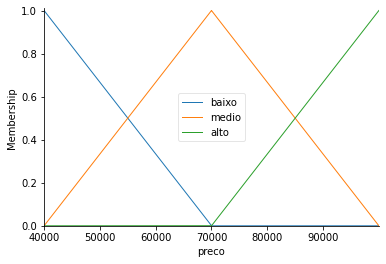

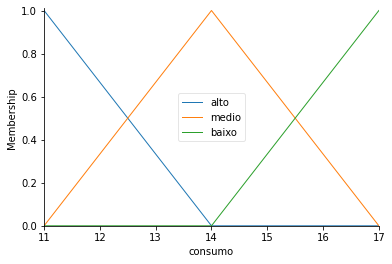

In [ ]:
#Plotagem dos gráficos das funções de pertinência das variáveis de entrada
preco.view()
consumo.view()

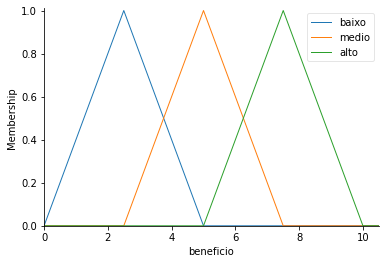

In [ ]:
#Classificações da variável de saída
#Define os valores para as faixas
beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0,2.5,5])
beneficio['medio'] = fuzz.trimf(beneficio.universe,[2.5,5,7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe,[5,7.5,10])

beneficio.view()

In [ ]:
#Regras para pertinencia
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])

In [ ]:
#Inserindo as regras no sistema
recomendacao_compra = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

#inserindo informações para a variável de entrada
recomendacao.input['preco'] = 50000
recomendacao.input['consumo'] = 16
recomendacao.compute()

6.25


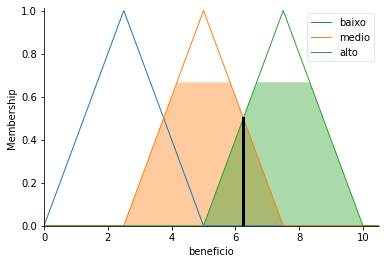

In [ ]:
print(recomendacao.output['beneficio'])
beneficio.view(sim = recomendacao)